# Multiple Linear Regression using Gradient Descent 

Gradient descent

Gradient desccent is a first-order iterative optimization algorithm for finding a local minimum of a differential function. The idea is to take repeated steps in the opposite direction of the gradient (or approximate gradient) of the function at the current point, because this is the direction of steepest descent. Gradient descent is simply used to find the values of a function's parameters (coefficients) that minimize a cost as far as possible.

The linear equation in multi-variant data is given by:-

y_pred = theta_0 + theta_1 * x1 + theta_2 * x2 +....+ theta_n * xn

where,
theta_0, theta_1, ...., theta_n = coefficients

x1, x2, ....,xn = features

y_pred = predicted value

While coding I have used b as a notation for theta_0 and weights or w as a notation of matrix from theta_1 to theta_n i.e

y_pred = b + w1 * x1 + w2 * x2 +... + wn * xn

Here, we are trying to find the value of the coefficients theta_0, theta_1,..., theta_n for which the cost function is minimum.



#### The Cost Function 

To evaluate any model, we need a cost function to evaluate how well our model is learning and adopting to new data. Here we use mean square error as the cost function J(theta) which is given as:-


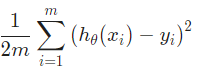

i.e. 1/2m times sum of squared error

where,
 
 m = total number of data
 
 error = y_pred - y_true
 
 

### Algorithm 

step 1: start with some values of thetas i.e coefficients (b and w)

step 2: Keep changing values of coefficients to reduce the cost function until we hopefully end up at a minimum.

repeat untill convergence{

theta_j = theta_j - alpha  * partial derivative of cost function with respect to theta_j

(simultaneusly update theta_j for j = 0,1,....,m)

}

Here, 

alpha = learning rate


#### Learning Rate

How big the steps are gradient descent takes into the direction of the local minimum are determined by the learning rate, which figures out how fast or slow we will move towards the optimal weights.

For gradient descent to reach the local minimum we must set the learning rate to an appropriate value, which is neither too low nor too high. This is important because if the steps it takes are too big, it may not reach the local minimum because it bounces back and forth between the convex function of gradient descent (see left image below). If we set the learning rate to a very small value, gradient descent will eventually reach the local minimum but that may take a while (see the right image). 

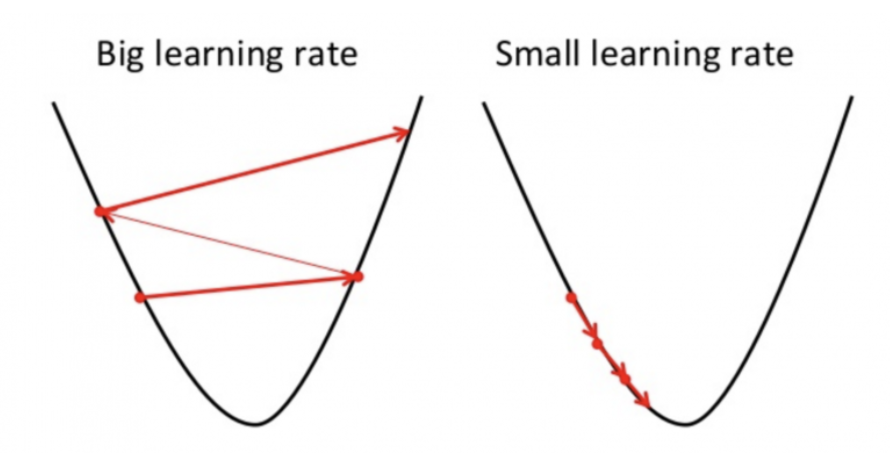

So, learning rate should never be too high or too low for this reason. We can check if the learning rate is doing well or not by plotting a graph between cost function and number of iterations. This helps us see the value of your cost function after each iteration of gradient descent, and provides a way to easily spot how appropriate our learning rate is. We can just try different values for it and plot them all together. The left image below shows such a plot, while the image on the right illustrates the difference between good and bad learning rates.

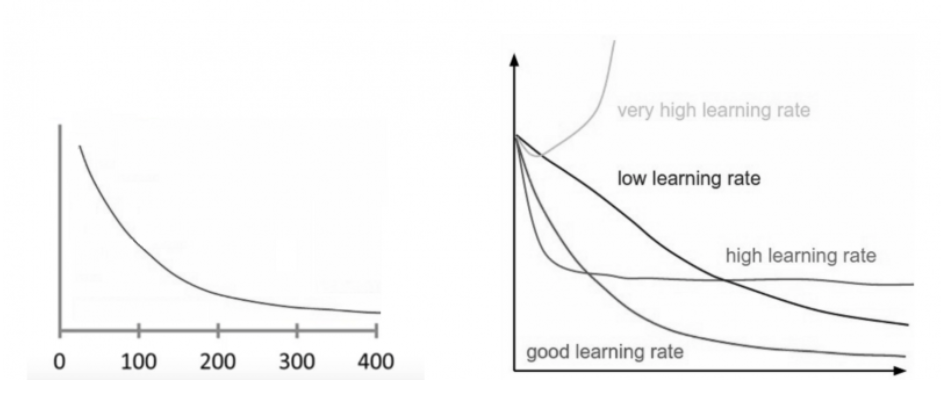

If gradient descent is working properly, the cost function should decrease after every iteration.

When gradient descent can’t decrease the cost-function anymore and remains more or less on the same level, it has converged

Lets dive into the code

## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the dataset

In [9]:
dataset = pd.read_csv("../dataset/energy.txt")
dataset.head()

,T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


In [10]:
dataset.isnull().sum() #checking null values

T     0
V     0
AP    0
RH    0
EP    0
dtype: int64

**Data Visualization**

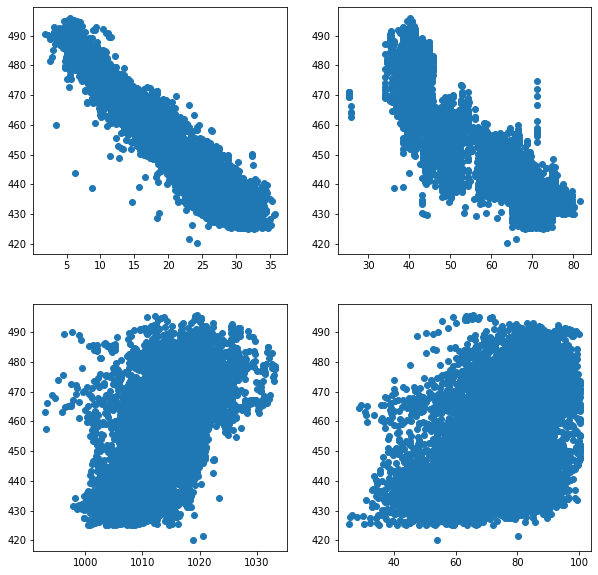

In [11]:
#Scatter Plot 
fig, ax =plt.subplots(nrows=2, ncols = 2, figsize = (10,10))
ax[0,0].scatter(dataset['T'], dataset['EP'])
ax[0,1].scatter(dataset['V'], dataset['EP'])
ax[1,0].scatter(dataset['AP'], dataset['EP'])
ax[1,1].scatter(dataset['RH'], dataset['EP'])

plt.show()


In [12]:
#Spliting the dataset into x and y
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [13]:
print(X)
print(y)

[[   8.58   38.38 1021.03   84.37]
 [  21.79   58.2  1017.21   66.74]
 [  16.64   48.92 1011.55   78.76]
 ...
 [  29.8    69.34 1009.36   64.74]
 [  16.37   54.3  1017.94   63.63]
 [  30.11   62.04 1010.69   47.96]]
[482.26 446.94 452.56 ... 437.65 459.97 444.42]


## Splitting the dataset into training and test dataset

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42)

In [15]:
print(X_train.shape[0])

5740


In [16]:
print(X_train)

[[  24.32   58.79 1016.8    65.61]
 [  20.42   62.96 1020.34   84.  ]
 [  11.21   44.03 1007.95   93.03]
 ...
 [  13.77   41.58 1020.63   72.94]
 [  22.72   69.13 1010.81   92.43]
 [   8.22   41.82 1032.77   71.63]]


In [17]:
print(X_test)

[[  24.06   69.94 1005.47   60.46]
 [  31.33   58.9  1003.77   52.34]
 [  25.9    59.54 1007.3    78.38]
 ...
 [  13.77   42.86 1012.86   88.83]
 [  25.48   58.95 1017.02   51.16]
 [  13.24   39.16 1016.52   86.66]]


In [18]:
print(y_train)

[442.78 452.08 471.79 ... 459.75 438.01 477.86]


In [19]:
print(y_test)

[436.88 439.54 439.36 ... 471.94 440.42 474.48]


## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [21]:
print(X_train.shape[0])

5740


In [22]:
print(X_train)

[[ 0.61879598  0.34550526  0.59680047 -0.52297839]
 [ 0.09600933  0.67297011  1.19158443  0.73911512]
 [-1.13857146 -0.81357897 -0.89015943  1.35883804]
 ...
 [-0.79540894 -1.00597439  1.24030967 -0.01992534]
 [ 0.40431941  1.15749245 -0.40962776  1.31766044]
 [-1.53937457 -0.98712749  3.28004901 -0.10982978]]


In [23]:
print(X_test)

[[ 0.58394354  1.22110073 -1.30684424 -0.87641947]
 [ 1.55847148  0.35414342 -1.59247495 -1.43368969]
 [ 0.8305916   0.40440181 -0.99937117  0.35341825]
 ...
 [-0.79540894 -0.9054576  -0.06519072  1.07059482]
 [ 0.7742915   0.35806986  0.63376444 -1.51467231]
 [-0.86645431 -1.19601394  0.54975541  0.92166916]]


## Implementing multiple linear regression from scratch using gradient descent

In [24]:
def cost_function(X, y, w, b):
    """
    Parameters:
    X: features
    y: target values
    w: weights i.e coefficients except theta_0
    b: bias i.e theta_0
    
    Returns:
    cost: cost with current weights and bias
    """
    cost = np.sum((((X.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [25]:
def gradient_descent_function(X, y, w, b, alpha=0.01, epochs=1000):
    """
    Parameters:
    X: features
    y: target values
    w: initial weights
    b: initial bias
    alpha: learning rate
    epochs: number of iterations
    
    Returns:
    costs: cost per epoch
    w: finalised weights
    b: finalised bias
    """
    m = len(y)
    cost_history = [0] * epochs
    
    for epoch in range(epochs):
        # Calculate the value -- Forward Propagation
        z = X.dot(w) + b
        
        # Calculate the losses
        loss = z - y
        
        # Calculate gradient descent
        weight_gradient = X.T.dot(loss) / m
        bias_gradient = np.sum(loss) / m
        
        # Update weights and bias
        w = w - alpha * weight_gradient
        b = b - alpha * bias_gradient
         
        # Store current lost
        cost = cost_function(X, y, w, b)
        cost_history[epoch] = cost
        
    return w, b, cost_history

In [26]:
# Initial random weights
w = np.random.randn(X_train.shape[1])
# Initial bias
b = 0
weights, bias, cost_history = gradient_descent_function(X_train, y_train, w, b, epochs = 2500);

Text(0.5, 1.0, 'Convergence of gradient descent')

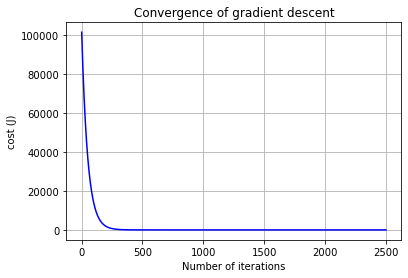

In [27]:
plt.plot(range(1, len(cost_history) +1), cost_history, color ='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Convergence of gradient descent")


Note that the curve flattened around at 250th iteration and remains same after that. This is the indication of convergence of gradient descent.

**Predicting the result**

In [28]:
y_pred = X_test.dot(weights) + bias

In [29]:
print(y_pred)

[443.07362347 433.32706845 439.94200623 ... 466.34453475 445.56553047
 468.93776592]


In [30]:
from sklearn.metrics import mean_squared_error, r2_score
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test,y_pred))

21.26699705098061
0.9300153413971668


Our model gives a r2_score of 0.93 which is pretty good.